In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from sklearn.metrics import silhouette_score

import seaborn as sns


print('Libraries imported.')

Libraries imported.


## EXPLORING THE FARMERS MARKET DATA

In [2]:
FM_NYC=pd.read_csv("DOHMH_Farmers_Markets.csv")


In [3]:
FM_NYC

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
1,Bronx,Bissel Gardens Farmers Market,Baychester Ave & E 241st St,40.901520,-73.846937,Wednesday & Saturday,9 a.m. - 5 p.m.,07/06/2019-11/27/2019,No,No,No,No,"(40.90152, -73.846937)"
2,Bronx,Bronx Borough Hall Greenmarket,Grand Concourse bet E 161st & 162nd Sts,40.826835,-73.922621,Tuesday,8 a.m. - 4 p.m.,06/04/19-11/26/19,Yes,No,Yes,No,"(40.826835, -73.922621)"
3,Bronx,Bronx Family Center Go!Healthy Farm Stand,1515 Southern Blvd,40.833734,-73.889934,Thursday,9:30 a.m. - 3:30 p.m.,07/11/2019-11/21/2019,Yes,No,No,Yes,"(40.833734, -73.889934)"
4,Bronx,BronxWorks Farm Stand,1130 Grand Concourse,40.832331,-73.919590,Thursday,10 a.m. -4 p.m.,07/08/2019-11/22/2019,Yes,No,No,No,"(40.832331, -73.91959)"
5,Bronx,CS211 Go!Healthy Farm Stand,1919 Prospect Ave,40.843546,-73.889755,Wednesday,2:30 - 5:30 p.m.,07/08/2019- 11/22/2019,Yes,No,No,No,"(40.843546, -73.889755)"
6,Bronx,Fordham Plaza Greenmarket,Park Ave bet E 189th St & E Fordham Rd,40.861530,-73.891063,Friday,8 a.m. - 4 p.m.,06/14/19-11/22/19,Yes,No,Yes,No,"(40.86153, -73.891063)"
7,Bronx,Friends of Van Cortlandt Park Amalgamated Hous...,Orloff Ave & Gale Pl,40.884532,-73.892172,Wednesday,2 - 7 p.m.,07/10/2019-08/21/2019,Yes,No,No,No,"(40.884532, -73.892172)"
8,Bronx,Harvest Home Co-op City Farm Stand,Asch Loop & Aldrich St,40.870249,-73.830963,Wednesday,8 a.m. - 4 p.m.,06/05/2019-11/20/2019,Yes,No,No,No,"(40.870249, -73.830963)"
9,Bronx,Harvest Home Hunts Point Farm Stand,E 163rd St & Hunts Point Ave,40.820986,-73.891613,Wednesday,8 a.m. - 4 p.m.,06/05/2019-11/20/2019,Yes,No,No,No,"(40.820986, -73.891613)"


 A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods. So, in this we will filter farmers' market data and explore it.

In [4]:
FM_NYC['Borough'].value_counts().to_frame()


,Borough
Brooklyn,45
Manhattan,41
Bronx,27
Queens,22
Staten Island,4


#### Visalizing the number of farmer markets in boroughs

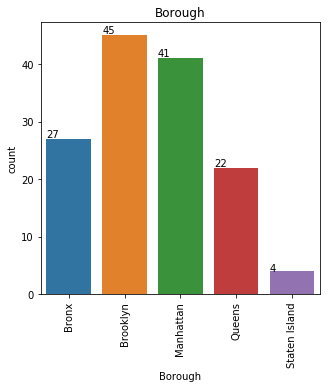

In [5]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

#### Farmer Markets superimposed on the map of New york

In [9]:

address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [10]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC['Latitude'], FM_NYC['Longitude'], FM_NYC['Market Name'], FM_NYC['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets